# Problem Set 2, due February 1 at 11:59 pm

###Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Parts 1 and 2 will be relatively easy; Part 3 will take more time.

*Also note:* For this assignment we are requiring you to use base **matplotlib** - no more Seaborn or other packages. This will help you become familiar with techniques for maintaining fine-grained control over your data visualizations. It will also help our graders, who spent countless hours in the past trying to make various versions import for grading.

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the Boston Housing Prices Data Set.  This used to be housed by [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing), but it is not housed there any more. You can read about it at [Kaggle](https://www.kaggle.com/vikrishnan/boston-house-prices) and at the [University of Toronto](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to f

---

## Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you feel that you are still in the beginning stages of analyzing data in Python, no problem. That is understandable. Just make sure to read some of the online resources like [this one](https://github.com/jrjohansson/scientific-python-lectures).

### 1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


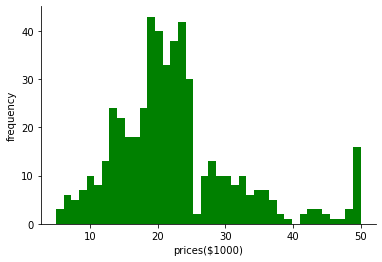

In [4]:
# prepare your jupyter notebook to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
fig, ax = plt.subplots()
ax.hist(bdata.target, bins = 40, color = "green", edgecolor = "none")
ax.set_xlabel("prices($1000)")
ax.set_ylabel("frequency")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


Text(0, 0.5, 'prices($1000)')

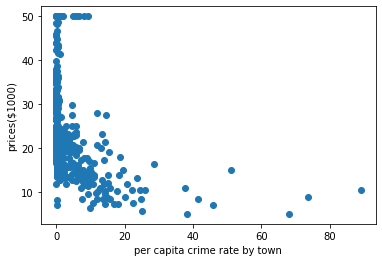

In [5]:
# enter your code below
fig, ax = plt.subplots()
ax.scatter(bdata.data[:,0], bdata.target)
ax.set_xlabel("per capita crime rate by town")
ax.set_ylabel("prices($1000)")

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

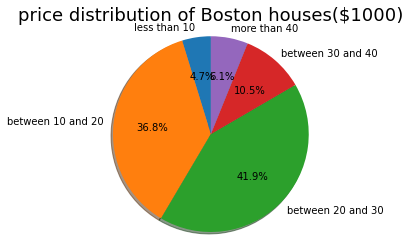

In [6]:
# enter your code here

# The distribution of house prices in pie chart
fig, ax = plt.subplots()
value0 = len(bdata.target[bdata.target<10])
value1 = len(bdata.target[(bdata.target>=10) & (bdata.target<20)])
value2 = len(bdata.target[(bdata.target>=20) & (bdata.target<30)])
value3 = len(bdata.target[(bdata.target>=30) & (bdata.target<40)])
value4 = len(bdata.target[bdata.target>=40])
sizes = [value0, value1, value2, value3, value4]
labels = ["less than 10", "between 10 and 20", "between 20 and 30", "between 30 and 40", "more than 40"]
ax.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
_ = ax.axis('equal')
_ = ax.set_title("price distribution of Boston houses($1000)", size = 18) 

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [7]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6))
2.08
"""
def compute_rmse(predictions, yvalues):
    diff = predictions - yvalues
    square = diff * diff
    rmse = np.sqrt(sum(square)/len(square))
    return rmse

### 2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [8]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(bdata.data, bdata.target, test_size=0.34)

### 2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [9]:
from sklearn.linear_model import LinearRegression

bad_y_train = [sum(y_train)/len(y_train) for i in y_train] 
model = LinearRegression().fit(x_train, bad_y_train)
bad_train_pred = model.predict(x_train)
print("The RMSE for training part is " + str(compute_rmse(bad_train_pred, bad_y_train)))
bad_test_pred = model.predict(x_test)
print("The RMSE for testing part is " + str(compute_rmse(bad_test_pred, y_test)))

The RMSE for training part is 0.0
The RMSE for testing part is 8.749574189135286


*The RMSE for testing datasets is much larger than training datasets and RMSE for training datasets is 0. This is what I expected since we are not using the real y data for training datasets to build model, the model fit for the training data and fake y data so well definitely will do a poor job when predicts the y_test. Therefore, it will generate a much larger RMSE.*

---

## Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [10]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
5

"""
def distance(x1, x2, L):
    sum1 = 0
    sum2 = 0
    for i in range(0,len(x1)):
        sum1 = sum1 + x1[i]**L
        sum2 = sum2 + x2[i]**L
    norm1 = sum1**(1/L)
    norm2 = sum2**(1/L)
    dist = np.abs(norm1-norm2)
    return dist

### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [11]:
"""
# For each observation in x_test, use for loop to find its nearest neighbor in x_train 
# and use the corresponding y value of the nearest neighbor in x_train as the predicted
# value of the observation in x_test
"""
import time
def nneighbor(x_train, x_test, y_train, y_test ,L):
    start_time = time.time()
    #your code here
    y_pred = np.empty([len(y_test)])
    for i in range(0,len(y_test)):
        min_index = 0
        min_dis = np.inf
        for j in range(0,len(y_train)):
            dis = distance(x_test[i,:],x_train[j,:],L)
            if dis < min_dis:
                min_dis = dis
                min_index = j
        y_pred[i] = y_train[min_index]
    rmse = compute_rmse(y_pred, y_test)
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return rmse
#your additional code here

In [12]:
x_train_sample =  x_train[:,[0,5]]
x_test_sample =  x_test[:,[0,5]]
nneighbor(x_train_sample, x_test_sample, y_train, y_test , 2)
# The RMSE is 10.575

Time taken: 0.34 seconds


10.574544087522618

### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [13]:
"""
# Data minus its mean then divided by its standard deviation
"""
def normalize(raw_data):
    normalized_data = raw_data.copy()
    for i in range(len(normalized_data[0])):       
        mean = np.mean(normalized_data[:,i])
        std = np.std(normalized_data[:,i])
        normalized_data[:,i] = (normalized_data[:,i] - mean)/std
    return normalized_data

#your additional code here

nx_train_sample = normalize(x_train_sample)
nx_test_sample = normalize(x_test_sample)
nneighbor(nx_train_sample, nx_test_sample, y_train, y_test, 2)

Time taken: 0.27 seconds


12.780073905003091

*The RMSE for normalized dataset is 12.780 which is greater than the unnomrmalized dataset(10.575).* 

### 3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [14]:
# enter your code here

#bdata_train, target_train, bdata_test, target_test

# model with two different features
normal_x_train = normalize(x_train[:,[6,9]])
normal_x_test = normalize(x_test[:,[6,9]])
print(nneighbor(normal_x_train, normal_x_test, y_train, y_test, 2))

# model with more than 4 features
normal_x_train = normalize(x_train)
normal_x_test = normalize(x_test)
print(nneighbor(normal_x_train, normal_x_test, y_train, y_test, 2))

# model with different value of L
normal_x_train = normalize(x_train)
normal_x_test = normalize(x_test)
print(nneighbor(normal_x_train, normal_x_test, y_train, y_test, 1))

# For fun
normal_x_train = normalize(x_train[:,[0,4,5,6,9]])
normal_x_test = normalize(x_test[:,[0,4,5,6,9]])
print(nneighbor(normal_x_train, normal_x_test, y_train, y_test, 4))

Time taken: 0.28 seconds
11.794490239090456
Time taken: 0.96 seconds
11.620390191731623
Time taken: 0.86 seconds
10.217900534330907
Time taken: 0.45 seconds
12.613239672221479


*The lowest RMSE value is 10.218, and that model is using all features with L of 1 in distance computing. Besides, it seems that more features will increase the running time of the algorithm, but different L values does not affect too much.*

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [15]:
def ten_fold_validation(X, y, L):
    RMSEs = np.empty(10)
    y = y.reshape(len(y),1)
    Xy = np.concatenate([X, y], axis=1)
    Xy = pd.DataFrame(Xy)
    Xy = Xy.sample(frac = 1,random_state=1).to_numpy()
    X = Xy[:,0:-1]
    y = Xy[:,-1]
    X = normalize(X)
    
    length = len(y)
    length10 = int(length/10)
    for i in range(0,10):
        if i != 9:
            y_test = y[i*length10:(i+1)*length10]
            x_test = X[i*length10:(i+1)*length10,:]
            x_train = np.concatenate((X[0:i*length10,:], X[(i+1)*length10:,:]),axis = 0)
            y_train = np.concatenate((y[0:i*length10], y[(i+1)*length10:]),axis = 0)
        else:
            x_test = X[i*length10:,:]
            y_test = y[i*length10:]
            x_train = X[0:i*length10,:]
            y_train = y[0:i*length10]
        RMSEs[i] = nneighbor(x_train, x_test, y_train, y_test, L)
    return np.mean(RMSEs)  

In [16]:
ten_fold_validation(bdata.data[:,[0,5]], bdata.target, 2)
# The average RMSE across the 10 iterations is 12.556

Time taken: 0.12 seconds
Time taken: 0.12 seconds
Time taken: 0.11 seconds
Time taken: 0.11 seconds
Time taken: 0.12 seconds
Time taken: 0.11 seconds
Time taken: 0.12 seconds
Time taken: 0.1 seconds
Time taken: 0.11 seconds
Time taken: 0.13 seconds


12.555952080363971

### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [17]:
"""
# Write knneighbor function based on nneighbor
# In knn method
# Do knneighbor() in each split way of data
"""
def knneighbor(x_train, x_test, y_train, y_test ,L, K):
    y_pred = np.empty([len(y_test)])
    for i in range(0,len(y_test)):
        distances = np.array([1])
        for j in range(0,len(y_train)):
            dis = distance(x_test[i,:],x_train[j,:],L)
            distances = np.concatenate((distances, np.array([dis])))
        distances = distances[1:]
        Sum = 0
        for q in np.argsort(distances)[:K]:
            Sum = Sum + y_train[q]
        avg = Sum/K
        y_pred[i] = avg    
    rmse = compute_rmse(y_pred, y_test)
    return rmse

def knn(X, y, L, K):
    start_time = time.time()
    RMSEs = np.empty(10)
    y = y.reshape(len(y),1)
    Xy = np.concatenate([X, y], axis=1)
    Xy = pd.DataFrame(Xy)
    Xy = Xy.sample(frac = 1,random_state=1).to_numpy()
    X = Xy[:,0:-1]
    y = Xy[:,-1]
    X = normalize(X)
    
    length = len(y)
    length10 = int(length/10)
    for i in range(0,10):
        if i != 9:
            y_test = y[i*length10:(i+1)*length10]
            x_test = X[i*length10:(i+1)*length10,:]
            x_train = np.concatenate((X[0:i*length10,:], X[(i+1)*length10:,:]),axis = 0)
            y_train = np.concatenate((y[0:i*length10], y[(i+1)*length10:]),axis = 0)
        else:
            x_test = X[i*length10:,:]
            y_test = y[i*length10:]
            x_train = X[0:i*length10,:]
            y_train = y[0:i*length10]
        RMSEs[i] = knneighbor(x_train, x_test, y_train, y_test,L,K)
    print("Time taken: " + str(round(time.time() - start_time,2)) + " seconds")
    return np.mean(RMSEs)

knn(bdata.data[:,[0,5]], bdata.target,2,3)
# The RMSE for K=3 is 10.325

Time taken: 1.82 seconds


10.324706444257846

### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [18]:
# enter your code here
RMSEs = np.empty(25)
for K in range(1, 26):
    RMSEs[K-1] = knn(bdata.data[:,[0,1,5,6,7,9]], bdata.target,2,K)

Time taken: 3.02 seconds
Time taken: 3.04 seconds
Time taken: 3.15 seconds
Time taken: 2.97 seconds
Time taken: 2.78 seconds
Time taken: 2.97 seconds
Time taken: 2.97 seconds
Time taken: 2.95 seconds
Time taken: 2.82 seconds
Time taken: 3.05 seconds
Time taken: 2.99 seconds
Time taken: 2.98 seconds
Time taken: 2.95 seconds
Time taken: 3.01 seconds
Time taken: 2.95 seconds
Time taken: 2.99 seconds
Time taken: 2.92 seconds
Time taken: 2.91 seconds
Time taken: 2.97 seconds
Time taken: 2.94 seconds
Time taken: 2.95 seconds
Time taken: 2.94 seconds
Time taken: 2.92 seconds
Time taken: 2.98 seconds
Time taken: 2.99 seconds


Text(0, 0.5, 'RMSE')

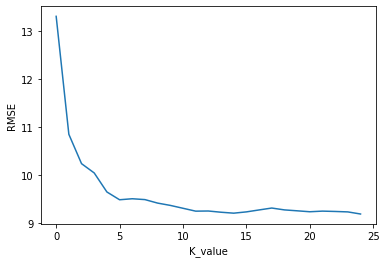

In [19]:
fig, ax = plt.subplots()
ax.plot(RMSEs)
ax.set_xlabel("K_value")
ax.set_ylabel("RMSE")

*According to the plot, RMSE has a decreasing pattern when K increases and the best choice here is K = 25 since it minimize the RMSE value.*